In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
os.chdir(r"C:\Users\Dell\Desktop\Finalproject")

In [3]:
df_val = pd.read_csv("XYZCorp_LendingData.txt",delimiter="\t",low_memory=False)

In [5]:
df_val=df_val[df_val.revol_util<101]

In [6]:
df_val=df_val[df_val.out_prncp>0]  #active users

NameError: name 'total_rev_hi_lim' is not defined

In [ ]:
df_val.info()

In [7]:
#removing all the working data 
df_val = df_val.drop(["addr_state","last_credit_pull_d","title","il_util", "max_bal_bc","total_bal_il","collection_recovery_fee", "collections_12_mths_ex_med", "desc", "funded_amnt", "funded_amnt_inv", "earliest_cr_line", "id", "member_id", "grade", "pymnt_plan", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "out_prncp", "out_prncp_inv","emp_title", "zip_code", "recoveries", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "mths_since_rcnt_il", "inq_last_6mths","total_acc","initial_list_status"],axis=1)

In [8]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601048 entries, 4 to 855968
Data columns (total 40 columns):
loan_amnt                      601048 non-null float64
term                           601048 non-null object
int_rate                       601048 non-null float64
installment                    601048 non-null float64
sub_grade                      601048 non-null object
emp_length                     601048 non-null object
home_ownership                 601048 non-null object
annual_inc                     601048 non-null float64
verification_status            601048 non-null object
issue_d                        601048 non-null object
purpose                        601048 non-null object
dti                            601048 non-null float64
delinq_2yrs                    601048 non-null float64
mths_since_last_delinq         303068 non-null float64
mths_since_last_record         99466 non-null float64
open_acc                       601048 non-null float64
pub_rec          

In [9]:
#dropping any coulumns with more than 50% na values as the dataset is too big to go for 75% rate
df_val = df_val.dropna(thresh=0.5*len(df_val),axis=1)

In [10]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601048 entries, 4 to 855968
Data columns (total 25 columns):
loan_amnt                 601048 non-null float64
term                      601048 non-null object
int_rate                  601048 non-null float64
installment               601048 non-null float64
sub_grade                 601048 non-null object
emp_length                601048 non-null object
home_ownership            601048 non-null object
annual_inc                601048 non-null float64
verification_status       601048 non-null object
issue_d                   601048 non-null object
purpose                   601048 non-null object
dti                       601048 non-null float64
delinq_2yrs               601048 non-null float64
mths_since_last_delinq    303068 non-null float64
open_acc                  601048 non-null float64
pub_rec                   601048 non-null float64
revol_bal                 601048 non-null float64
revol_util                601048 non-null floa

In [11]:
#checking categorical columns with less than 1 unique value 
for col in df_val.columns:
    if (len(df_val[col].unique()) < 3):
        print(df_val[col].value_counts())
        print()

 36 months    402315
 60 months    198733
Name: term, dtype: int64

1.0    601048
Name: policy_code, dtype: int64

INDIVIDUAL    600609
JOINT            439
Name: application_type, dtype: int64

0    599836
1      1212
Name: default_ind, dtype: int64



In [12]:
#removing policy code, for a single unique value
#removing application_type, due to the distribution being to baised
df_val = df_val.drop(["policy_code","application_type"],axis=1)

In [13]:
###checking the null values

In [14]:
#checking and imputing missing values
df_val.isnull().sum()

loan_amnt                      0
term                           0
int_rate                       0
installment                    0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
purpose                        0
dti                            0
delinq_2yrs                    0
mths_since_last_delinq    297980
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
acc_now_delinq                 0
tot_coll_amt                3604
tot_cur_bal                 3604
total_rev_hi_lim            3604
default_ind                    0
dtype: int64

In [15]:
df_val = df_val.drop(["mths_since_last_delinq"],axis=1)

In [16]:
#all the missing data columns are numerical
#columns with missing data
#total_rev_hi_lim,tot_cur_bal,tot_coll_amt,revol_util

In [17]:
df_val.revol_util.fillna(df_val.revol_util.mean(),inplace=True) 

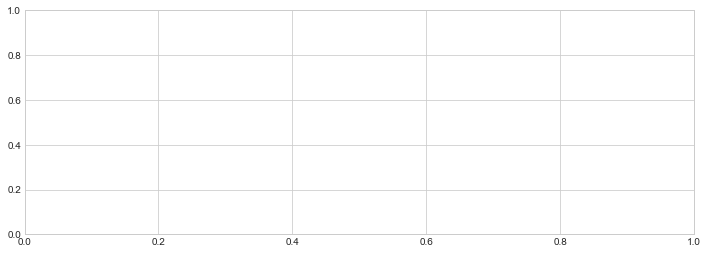

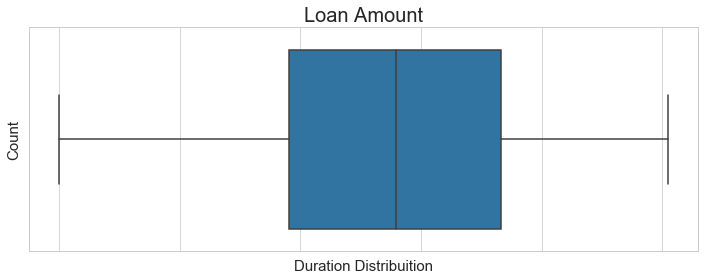

In [31]:
#loan_status and loan_amount
plt.figure(figsize = (12,14))
plt.subplot(313)
g2 = sns.boxplot("revol_util", data=df_val)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Duration Distribuition", fontsize=15)
g2.set_ylabel("Count", fontsize=15)
g2.set_title("Loan Amount", fontsize=20)
plt.show()

In [18]:
import matplotlib.pyplot as plt

from pylab import rcParams
import seaborn as sb


rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

In [19]:
plyt

NameError: name 'revol_util' is not defined

In [20]:
df_val.total_rev_hi_lim.fillna(df_val.total_rev_hi_lim.mean(),inplace=True)

In [21]:
df_val.tot_coll_amt.fillna(df_val.tot_coll_amt.mean(),inplace=True) 

In [22]:
df_val.tot_cur_bal.fillna(df_val.tot_cur_bal.mean(),inplace=True) 

In [23]:
#treatment of categorical data

In [32]:
#ordinal columns 
df_val.emp_length.value_counts()

10+ years    204547
2 years       52255
3 years       46861
< 1 year      46535
1 year        37874
5 years       35630
4 years       34331
n/a           33079
8 years       30478
7 years       29020
6 years       26622
9 years       23816
Name: emp_length, dtype: int64

In [33]:
mapped = {
    "emp_length":{
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0

    },
    
}

In [34]:
df_val = df_val.replace(mapped)

In [35]:
#ALL categorical columns
obj_cols = ["verification_status","purpose","term","home_ownership","sub_grade"]

In [36]:
# for preprocessing the data converting category to numerical
from sklearn import preprocessing
le={}

for x in obj_cols:
    le[x]=preprocessing.LabelEncoder()
    
for x in obj_cols:
    df_val[x]=le[x].fit_transform(df_val.__getattr__(x))
df_val.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
4,3000.0,1,12.69,67.79,9,1,5,80000.0,1,Dec-2011,...,0.0,15.0,0.0,27783.0,53.9,0.0,232.815444,140170.271048,32982.191529,0
6,7000.0,1,15.96,170.08,14,8,5,47004.0,0,Dec-2011,...,0.0,7.0,0.0,17726.0,85.6,0.0,232.815444,140170.271048,32982.191529,0
32,10000.0,1,15.96,242.97,14,2,5,29120.0,2,Dec-2011,...,0.0,11.0,0.0,16158.0,63.6,0.0,232.815444,140170.271048,32982.191529,0
39,12500.0,1,12.69,282.44,9,1,5,27000.0,2,Dec-2011,...,0.0,6.0,0.0,10143.0,50.0,0.0,232.815444,140170.271048,32982.191529,0
61,17500.0,1,17.27,223.74,17,6,5,40000.0,2,Dec-2011,...,0.0,5.0,0.0,10724.0,58.9,0.0,232.815444,140170.271048,32982.191529,0


In [37]:
df_val = df_val.drop(["tot_coll_amt","revol_bal","acc_now_delinq","installment","issue_d","int_rate"],axis=1)


In [38]:
df_val.to_csv("df_val_clean.csv",index=False)